## This notebook demonstarates the S-Method. 
See Boashash+15 Section 6.2 for instance.

In [2]:
using Winston;
using Color;
using PyPlot
import DSP

In [3]:
include("../juwvid.jl")

juwvid

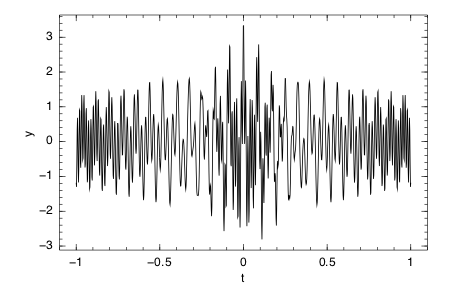

In [4]:
# multicomponent data (Boashash+15,p346,Example 6.2.2)
nsample=1024
t,x=sampledata.genmultifm622(nsample);
Winston.plot(t,x)
Winston.xlabel("t")
Winston.ylabel("y")

### For the multi component FM, (pseudo) Wigner Ville has severe contaminations from cross terms  

Single pseudo Wigner Ville


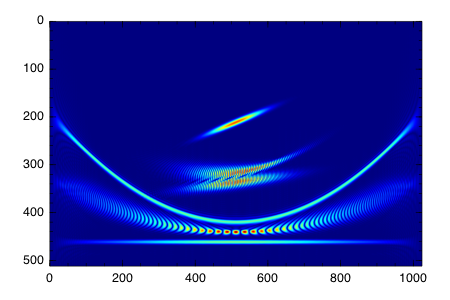

Use fft.


In [6]:
# pseudo Wigner Ville
z=DSP.Util.hilbert(x);
tfr=cohenclass.tfrpwv(z);
imagesc(abs(tfr[end/2:-1:1,:]))

### STFT is not affected by the cross terms, but, the resolution is poor.

Use fft.


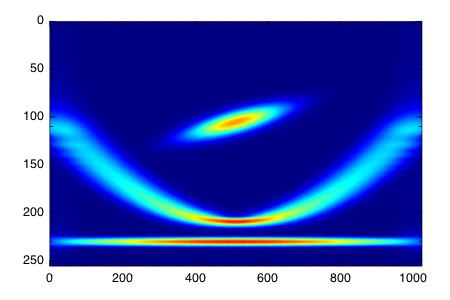

In [7]:
# STFT
tfrstft=stft.tfrstft(x,NaN,NaN,NaN,NaN,4);
imagesc(abs(tfrstft[end/4:-1:1,:]))

### S-method has both advantages of the WV and STFT

Use fft.


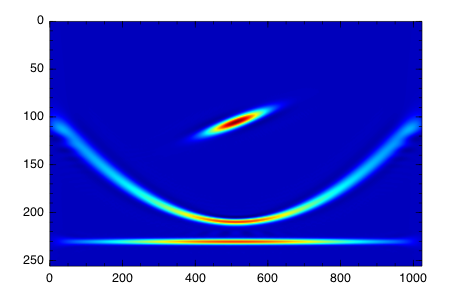

In [9]:
# S-method (constant Lp)
sm=smethod.tfrsm(x,5,NaN,4)
imagesc(sm[end/4:-1:1,:])

#### SM with N/2 = WV

Use fft.


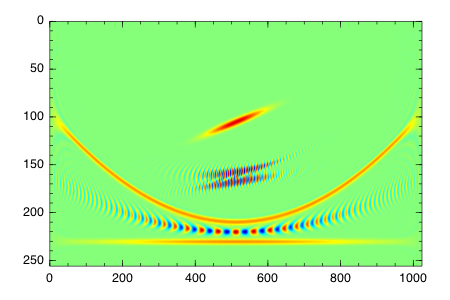

In [10]:
# Alias-free PWV = SM for Lp=N/2
trfafwv=smethod.tfrsm(x,floor(Int,nsample/2),NaN,4)
imagesc(trfafwv[end/4:-1:1,:])